# IAM hands-on session from the 2019 AERE pre-conference Workshop

## 2. Running Models

This section demonstrates how you can run a number of widely used integrated assessment models and extract results from these model runs. There are comments that explain the code for the first example of DICE2010, the remaining models then follow the same pattern.

### Configuration

In [1]:
use_explore = false;

### MimiDICE2010

First we load the [Mimi.jl](https://github.com/mimiframework/Mimi.jl) package into this session. It provides much of the functionality for running the IAMs in this example.

In [2]:
using Mimi

Next we load the definition of the [MimiDICE2010.jl](https://github.com/anthofflab/MimiDICE2010.jl) model into our session. Note that the model is packaged as a standard Julia package, so we can use the same syntax that we use to load any other package.

In [3]:
using MimiDICE2010

Next we create an _instance_ of MimiDICE2010 and assign it to a local variable called `m`.

In [4]:
m = MimiDICE2010.get_model()

9-component Mimi.Model:
  grosseconomy::MimiDICE2010.grosseconomy
  emissions::MimiDICE2010.emissions
  co2cycle::MimiDICE2010.co2cycle
  radiativeforcing::MimiDICE2010.radiativeforcing
  climatedynamics::MimiDICE2010.climatedynamics
  sealevelrise::MimiDICE2010.sealevelrise
  damages::MimiDICE2010.damages
  neteconomy::MimiDICE2010.neteconomy
  welfare::MimiDICE2010.welfare


We can use the `plot_comp_graph` function to show us a graphical representation of the internal structure of the model.

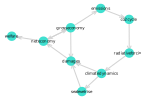

In [5]:
plot_comp_graph(m)

Next, we can run our model `m`. This will evaluate all the equations of the model and make all outputs of the model accessible for us.

In [6]:
run(m)

If you are running this notebook on your local computer, you can explore the results of your model interactively:

In [7]:
if use_explore
    explore(m)
end

You can access any variable inside a model by using indexing notation `[]`, where you pass the name of the component as the first argument, and the name of the variable you want to show as the second argument. Both names need to be passed as `Symbol`s. You retrieve a standard array with the data for that variable in this way.

In the following example we retrieve the value of the `TATM` variable in the `climatedynamics` component.

In [8]:
m[:climatedynamics, :TATM]

60-element Array{Union{Missing, Float64},1}:
 0.83              
 0.98              
 1.3881597063065039
 1.7763568832996077
 2.143378418542003 
 2.48771553569001  
 2.8087148591501157
 3.10671639649217  
 3.382825259538321 
 3.6386207932274326
 3.8759150825139432
 4.107603640506595 
 4.3320678899024765
 ⋮                 
 5.735088811443862 
 5.726047781785632 
 5.717682476124955 
 5.7098486040987675
 5.702425576261056 
 5.695313048813406 
 5.688427888709104 
 5.681701533558629 
 5.675077712524968 
 5.6685104910086705
 5.6619626016188915
 5.655404025496941 

You can also directy plot the content of the variable with the `Mimi.plot` function. You pass the model as the first argument, the name of the component as the second and the name of the variable as the third argument:

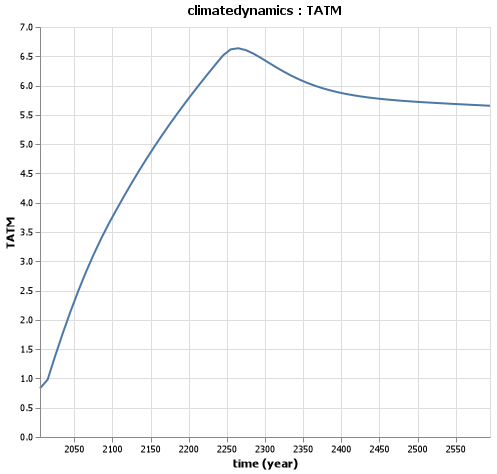

In [9]:
Mimi.plot(m, :climatedynamics, :TATM)

The final option for retrieving data from a model is to use the `getdataframe` function. You again specify what variable in which component you want to retrieve, and then you get a tabular data structure back. The benefit of this approach is that the values receive labels for things like time.

In [10]:
getdataframe(m, :climatedynamics, :TATM)

,time,TATM
,Int64,Float64⍰
1,2005,0.83
2,2015,0.98
3,2025,1.38816
4,2035,1.77636
5,2045,2.14338
6,2055,2.48772
7,2065,2.80871
8,2075,3.10672
9,2085,3.38283


You can also easily save such a tabular output as for example a CSV file with the [CSVFiles.jl](https://github.com/queryverse/CSVFiles.jl) package. Here you pipe the result of the `getdataframe` call to the `save` function.

In [11]:
getdataframe(m, :climatedynamics, :TATM) |> save("dice_tatm.csv")

### MimiRICE2010

This section shows how you can run [MimiRICE2010.jl](https://github.com/anthofflab/MimiRICE2010.jl). All the function calls and patterns are identical to the previous section, so they are not documented again.

In [12]:
using MimiRICE2010

In [13]:
m_rice = MimiRICE2010.get_model()

10-component Mimi.Model:
  grosseconomy::MimiRICE2010.grosseconomy
  emissions::MimiRICE2010.emissions
  co2cycle::MimiRICE2010.co2cycle
  radiativeforcing::MimiRICE2010.radiativeforcing
  climatedynamics::MimiRICE2010.climatedynamics
  sealevelrise::MimiRICE2010.sealevelrise
  sealeveldamages::MimiRICE2010.sealeveldamages
  damages::MimiRICE2010.damages
  neteconomy::MimiRICE2010.neteconomy
  welfare::MimiRICE2010.welfare


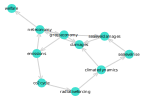

In [14]:
plot_comp_graph(m_rice)

In [15]:
run(m_rice)

If you are running this notebook on your local computer, you can explore the resulting model interactively:

In [16]:
if use_explore
    explore(m_rice)
end

Note how the `DAMFRAC` variable in the `damage` component in RICE has a region index, and how the plot automatically shows the values for each region separately.

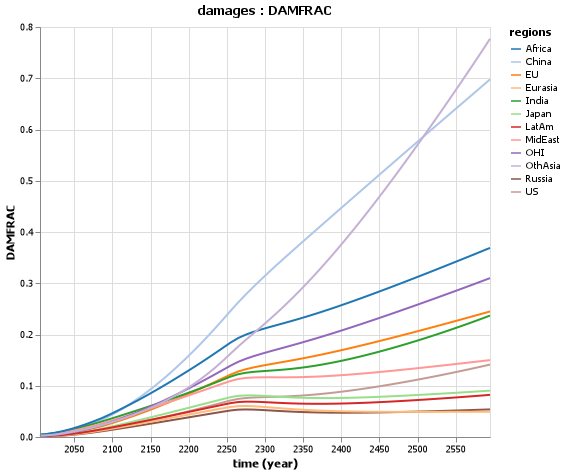

In [17]:
Mimi.plot(m_rice, :damages, :DAMFRAC)

When you retrieve a variable via the indexing notation, you get a matrix in this example, because there is a separate value for each region, represented as different columns in the matrix.

In [18]:
m_rice[:damages, :DAMFRAC]

60×12 Array{Union{Missing, Float64},2}:
 0.000974191  0.0010961   0.00111411  …  0.00143233  0.00107738  0.00265159
 0.0013657    0.00262769  0.00168386     0.00189106  0.0030018   0.00342245
 0.00215048   0.00378968  0.0026072      0.0027875   0.00427721  0.00484042
 0.00328809   0.00554239  0.00395169     0.00404145  0.00620266  0.00678363
 0.00477763   0.00777524  0.00570216     0.00564056  0.00863626  0.00921929
 0.00659265   0.010463    0.00782544  …  0.00755042  0.0115474   0.0121004 
 0.00868886   0.0135484   0.0102745      0.00972228  0.0148766   0.0153652 
 0.0110204    0.0169749   0.0129951      0.0121084   0.0185666   0.0189592 
 0.0135494    0.020697    0.0159395      0.0146704   0.0225761   0.0228448 
 0.0162672    0.0249936   0.0191094      0.0173858   0.0273024   0.027137  
 0.0191485    0.029636    0.0224565   …  0.0202329   0.0324381   0.0318028 
 0.0221002    0.0345422   0.0258735      0.023115    0.0379181   0.0367587 
 0.0251188    0.0396409   0.0293524      0.02603

When you retrieve the data as a `DataFrame`, values are automatically labeled with both their year and region.

In [19]:
getdataframe(m_rice, :damages, :DAMFRAC)

,time,regions,DAMFRAC
,Int64,String,Float64⍰
1,2005,US,0.000974191
2,2005,EU,0.0010961
3,2005,Japan,0.00111411
4,2005,Russia,0.000792638
5,2005,Eurasia,0.000898825
6,2005,China,0.00151848
7,2005,India,0.00480309
8,2005,MidEast,0.0033999
9,2005,Africa,0.00419631


### MimiFUND

This section shows how you can run [MimiFUND.jl](https://github.com/fund-model/MimiFUND.jl). All the function calls and patterns are identical to the previous section, so they are not documented again.

In [20]:
using MimiFUND

In [21]:
m_fund = MimiFUND.get_model()

29-component Mimi.Model:
  scenariouncertainty::MimiFUND.scenariouncertainty
  population::MimiFUND.population
  geography::MimiFUND.geography
  socioeconomic::MimiFUND.socioeconomic
  emissions::MimiFUND.emissions
  climateco2cycle::MimiFUND.climateco2cycle
  climatech4cycle::MimiFUND.climatech4cycle
  climaten2ocycle::MimiFUND.climaten2ocycle
  climatesf6cycle::MimiFUND.climatesf6cycle
  climateforcing::MimiFUND.climateforcing
  climatedynamics::MimiFUND.climatedynamics
  biodiversity::MimiFUND.biodiversity
  climateregional::MimiFUND.climateregional
  ocean::MimiFUND.ocean
  impactagriculture::MimiFUND.impactagriculture
  impactbiodiversity::MimiFUND.impactbiodiversity
  impactcardiovascularrespiratory::MimiFUND.impactcardiovascularrespiratory
  impactcooling::MimiFUND.impactcooling
  impactdiarrhoea::MimiFUND.impactdiarrhoea
  impactextratropicalstorms::MimiFUND.impactextratropicalstorms
  impactforests::MimiFUND.impactforests
  impactheating::MimiFUND.impactheating
  impactvectorb

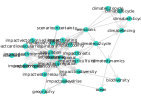

In [22]:
plot_comp_graph(m_fund)

In [23]:
run(m_fund)

If you are running this notebook on your local computer, you can explore the results of your model interactively:

In [24]:
if use_explore
    explore(m_fund)
end

### MimiDICE2013

This section shows how you can run [MimiDICE2013.jl](https://github.com/anthofflab/MimiDICE2013.jl). All the function calls and patterns are identical to the previous section, so they are not documented again.

In [25]:
using MimiDICE2013

In [26]:
m_dice2013 = MimiDICE2013.get_model()

8-component Mimi.Model:
  grosseconomy::MimiDICE2013.grosseconomy
  emissions::MimiDICE2013.emissions
  co2cycle::MimiDICE2013.co2cycle
  radiativeforcing::MimiDICE2013.radiativeforcing
  climatedynamics::MimiDICE2013.climatedynamics
  damages::MimiDICE2013.damages
  neteconomy::MimiDICE2013.neteconomy
  welfare::MimiDICE2013.welfare


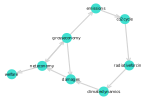

In [27]:
plot_comp_graph(m_dice2013)

In [28]:
run(m_dice2013)

If you are running this notebook on your local computer, you can explore the results of your model interactively:

In [29]:
if use_explore
    explore(m_dice2013)
end

### MimiPAGE2009

This section shows how you can run [MimiPAGE2009.jl](https://github.com/anthofflab/MimiPAGE2009.jl). All the function calls and patterns are identical to the previous section, so they are not documented again.

In [30]:
using MimiPAGE2009

In [31]:
m_page = MimiPAGE2009.get_model()

36-component Mimi.Model:
  co2emissions::MimiPAGE2009.co2emissions
  co2cycle::MimiPAGE2009.co2cycle
  co2forcing::MimiPAGE2009.co2forcing
  ch4emissions::MimiPAGE2009.ch4emissions
  ch4cycle::MimiPAGE2009.ch4cycle
  ch4forcing::MimiPAGE2009.ch4forcing
  n2oemissions::MimiPAGE2009.n2oemissions
  n2ocycle::MimiPAGE2009.n2ocycle
  n2oforcing::MimiPAGE2009.n2oforcing
  LGemissions::MimiPAGE2009.LGemissions
  LGcycle::MimiPAGE2009.LGcycle
  LGforcing::MimiPAGE2009.LGforcing
  SulphateForcing::MimiPAGE2009.SulphateForcing
  TotalForcing::MimiPAGE2009.TotalForcing
  ClimateTemperature::MimiPAGE2009.ClimateTemperature
  SeaLevelRise::MimiPAGE2009.SeaLevelRise
  Population::MimiPAGE2009.Population
  GDP::MimiPAGE2009.GDP
  AbatementCostParametersCO2::MimiPAGE2009.AbatementCostParameters
  AbatementCostParametersCH4::MimiPAGE2009.AbatementCostParameters
  AbatementCostParametersN2O::MimiPAGE2009.AbatementCostParameters
  AbatementCostParametersLin::MimiPAGE2009.AbatementCostParameters
  Abateme

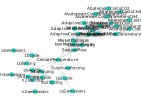

In [32]:
plot_comp_graph(m_page)

In [33]:
run(m_page)

If you are running this notebook on your local computer, you can explore the results of your model interactively:

In [34]:
if use_explore
    explore(m_page)
end